# Analysis

This notebook contains the analysis of how different layers of batchnorm and dropout, data augmentation, and adaptive gradienct descent effect the accuracy and training time of our Resnet50 model.

# Batchnorm and Dropout

Analysis of how different layers of dropout and batchnorm, and different dropout probabilities effect the accuracy and training time

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Read Data
data = pd.read_csv('../data/bn_dropout_batch_size_64.csv')
data.head()

,BN Layers,Drp Layers,Drp Probability,Accuracy,Training Time,TTA 0.87
0,0,0,0.0,0.7164,3980.160950,NaN
1,0,1,0.2,0.7403,4164.198270,416.766010
2,0,1,0.5,0.7122,4139.772803,886.688595
3,0,1,0.8,0.6577,4186.440722,1318.508839
4,0,2,0.2,0.7230,4373.524526,920.297521


## Dropout Layers

In [5]:
data_bn_0 = data.loc[data['BN Layers']==0]
data_bn_1 = data.loc[data['BN Layers']==1]
data_bn_2 = data.loc[data['BN Layers']==2]
data_bn_3 = data.loc[data['BN Layers']==3]

In [11]:
groups_bn_0 = data_bn_0.groupby('Drp Probability')
groups_bn_1 = data_bn_1.groupby('Drp Probability')
groups_bn_2 = data_bn_2.groupby('Drp Probability')
groups_bn_3 = data_bn_3.groupby('Drp Probability')

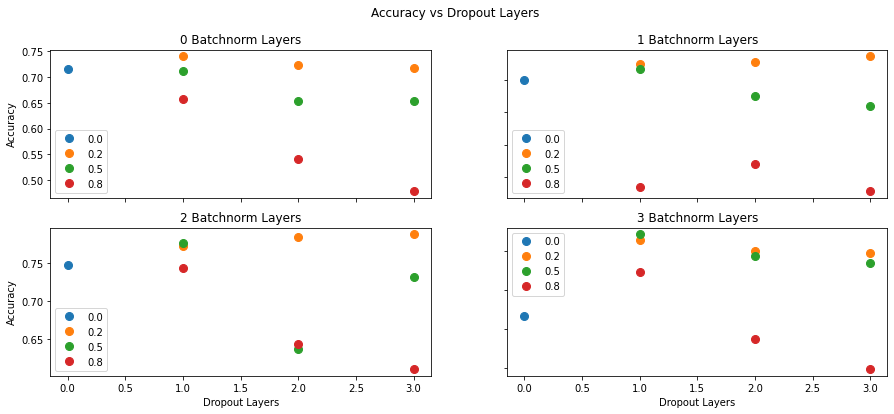

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Accuracy vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8,label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='',ms=8,  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8,label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/acc_drplayer.jpg')

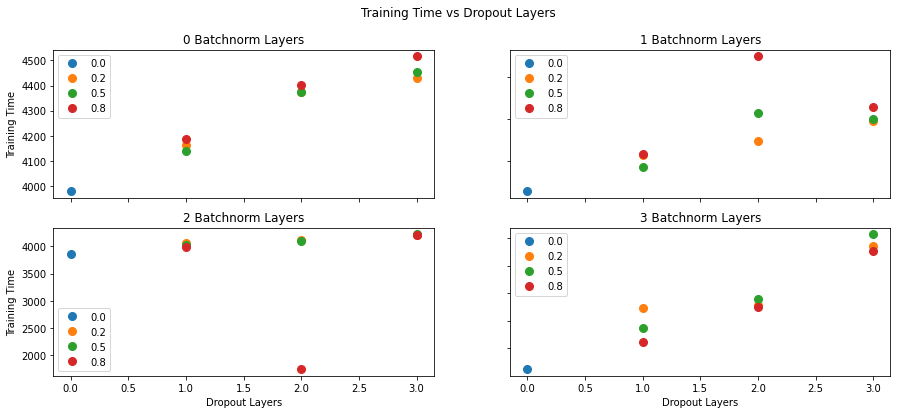

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Training Time vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='Training Time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tt_drplayer.jpg')

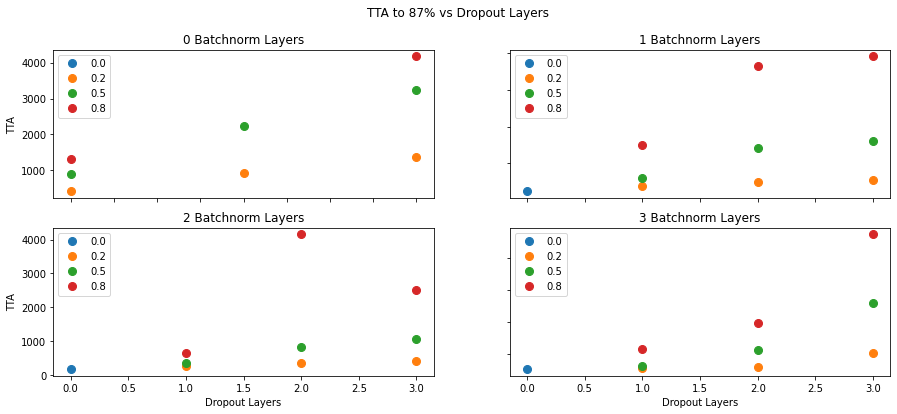

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('TTA to 87% vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='TTA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tta_drplayer.jpg')

## BatchNorm Layers

In [25]:
data_d_0 = data.loc[data['Drp Layers']==0]
data_d_1 = data.loc[data['Drp Layers']==1]
data_d_2 = data.loc[data['Drp Layers']==2]
data_d_3 = data.loc[data['Drp Layers']==3]

In [26]:
groups_d_0 = data_d_0.groupby('Drp Probability')
groups_d_1 = data_d_1.groupby('Drp Probability')
groups_d_2 = data_d_2.groupby('Drp Probability')
groups_d_3 = data_d_3.groupby('Drp Probability')

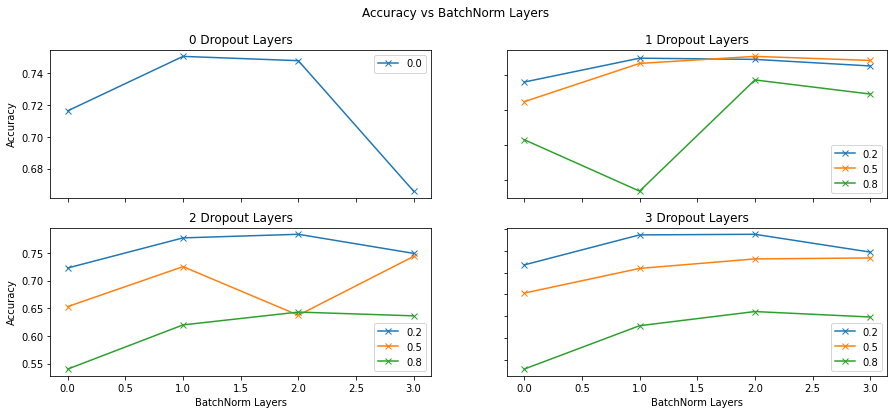

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Accuracy vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/acc_bnlayer.jpg')

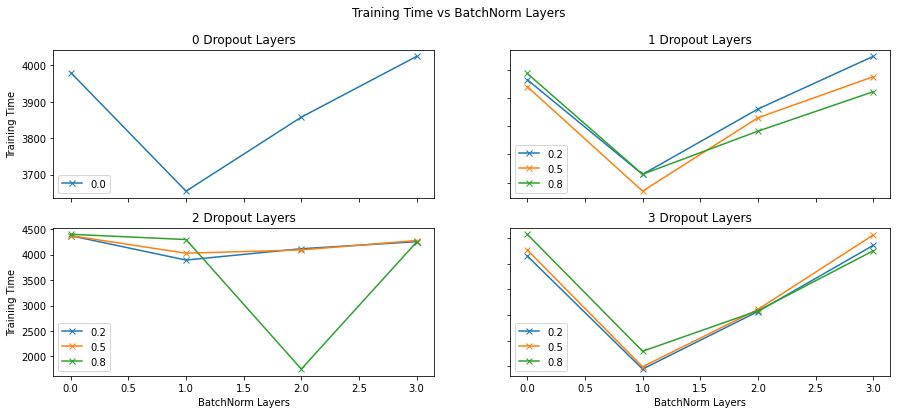

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Training Time vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='Training Time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tt_bnlayer.jpg')

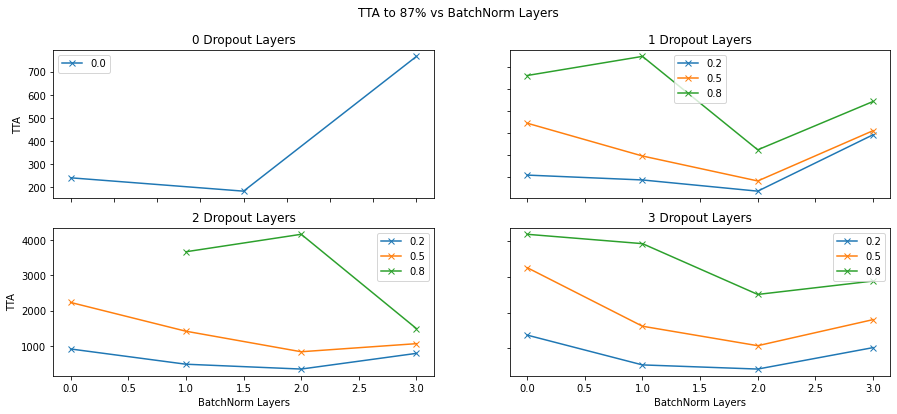

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('TTA to 87% vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='TTA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tta_bnlayer.jpg')

## Dropout Probability

In [3]:
data_dp_2 = data.loc[data['Drp Probability']==0.2]
data_dp_5 = data.loc[data['Drp Probability']==0.5]
data_dp_8 = data.loc[data['Drp Probability']==0.8]

In [4]:
groups_dp_2 = data_dp_2.groupby('Drp Layers')
groups_dp_5 = data_dp_5.groupby('Drp Layers')
groups_dp_8 = data_dp_8.groupby('Drp Layers')

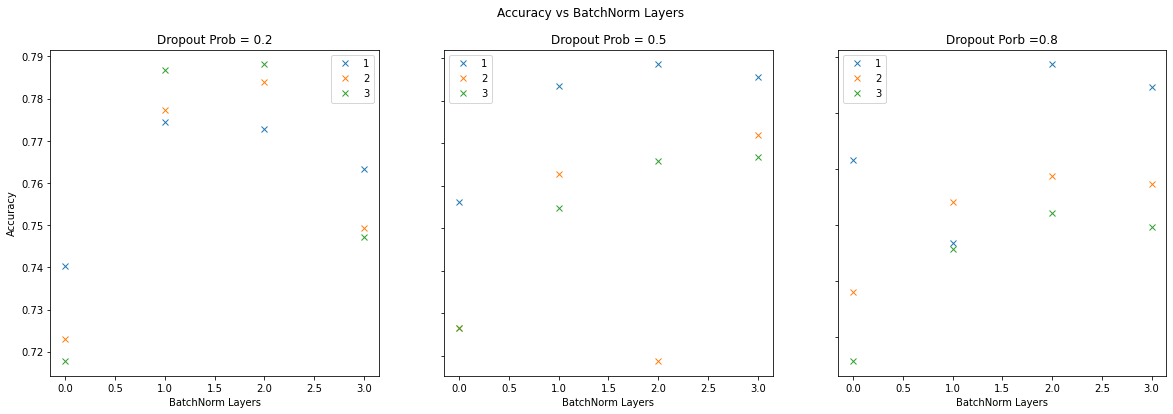

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Accuracy vs BatchNorm Layers')

for name, group in groups_dp_2:    
    axs[0].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='', label=name)
axs[0].legend()
axs[ 0].set_title('Dropout Prob = 0.2')

for name, group in groups_dp_5:    
    axs[1].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='',  label=name)
axs[1].legend()
axs[1].set_title('Dropout Prob = 0.5')

for name, group in groups_dp_8:    
    axs[2].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='',  label=name)
axs[2].legend()
axs[2].set_title('Dropout Porb =0.8')


for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/acc_drpprob.jpg')

## Observations and Analysis

1. Dropout Layers: The training time and TTA (87%) mostly increases with an increase in dropout layers. The accuracy generally depends on the dropout probability and number of batchnorm layers. The best droout probability across the board is 0.2. When we fix the number of batchnorm layers and dropout probabilities, there are very small differences in the accuracies when we change the number of dropout layers. Using a dropout probability of 0.2 is much better than using no (or, more dropout layers). In this case, using 3 dropout layers seems to be the most beneficial.

2. Batchnorm Layers:It seems to be better to keep 1 or 2 batchnorm layers in the Resnet50 model. 1 Batchnorm layer consistently provides the smallest training time,  and using 2 batchnorm layers give the shortest time to achieve an 87% accuracy. Here as well, it seems like keeping a dropout probability of 0.2 gives the best result, giving very little differences in accuracies between either 1 or 2 dropout layers.

Thus, the best combination is seen by using 2 batch norm layers, 3 dropout layers of probability 0.2.

## Batchsize Analysis

Comparing the performance of models with dropout=0.2 for batch sizes 256 

In [4]:
data= pd.read_csv('../data/bn_dropout_batch_size_256.csv')
data.head()

,BN Layers,Dropout ID,Dopout CONV,Dropout Prob,Accuracy,Traning Time,TTA 0.87
0,0,0,0,0.0,0.7084,708.535605,82.082443
1,0,1,1,0.2,0.7103,705.064444,87.687913
2,0,2,2,0.2,0.6968,716.310326,118.210271
3,0,3,3,0.2,0.6814,744.164206,136.940571
4,1,0,0,0.0,0.7211,716.016660,60.920348


In [10]:
groups = data.groupby('Dropout ID')

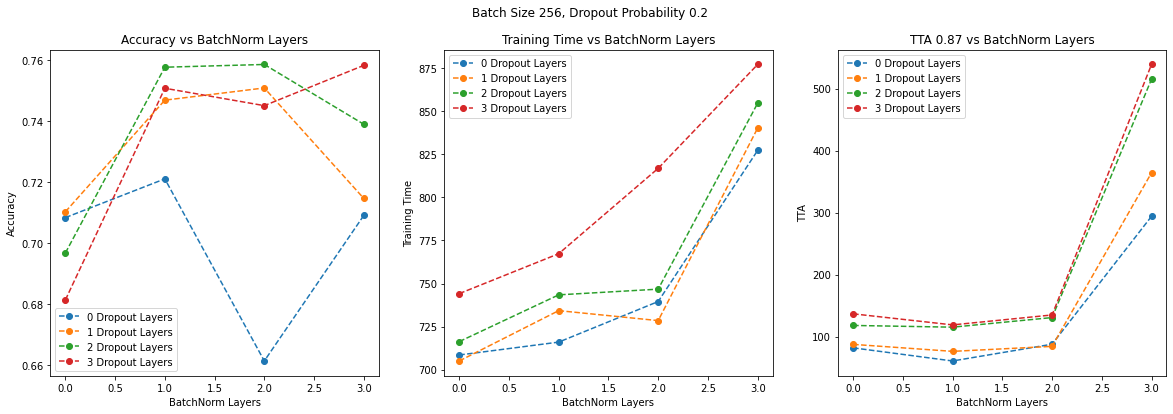

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Batch Size 256, Dropout Probability 0.2')

for name, group in groups:    
    axs[0].plot(group['BN Layers'], group['Accuracy'], marker='o', linestyle='--', label= str(name) + ' Dropout Layers')
axs[0].legend()
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('BatchNorm Layers')
axs[0].set_title('Accuracy vs BatchNorm Layers')

for name, group in groups:    
    axs[1].plot(group['BN Layers'], group['Traning Time'], marker='o', linestyle='--', label= str(name) + ' Dropout Layers')
axs[1].legend()
axs[1].set_ylabel('Training Time')
axs[1].set_xlabel('BatchNorm Layers')
axs[1].set_title('Training Time vs BatchNorm Layers')

for name, group in groups:    
    axs[2].plot(group['BN Layers'], group['TTA 0.87'], marker='o', linestyle='--', label= str(name) + ' Dropout Layers')
axs[2].legend()
axs[2].set_ylabel('TTA')
axs[2].set_xlabel('BatchNorm Layers')
axs[2].set_title('TTA 0.87 vs BatchNorm Layers')

plt.savefig('../figures/batchsize_256_drpprob_2.jpg')

For a batch size of 256, we see that 2 dropout layers are more beneficial. Thus, a good combination would be 2 batch norm layers, 2 dropout layers and a dropout probability of 0.2

# Adaptive Gradient Clipping

Analysis of the performance of Adaptive Gradient Clipping. Trained on a batch size of 256 and for 100 epochs. Dropout Probability =0.2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
acg = pd.read_csv('../data/acg.csv')
acg.head()

,num_dp_layers,Accuracy,Traning Time,TTA 0.87
0,0,0.7005,864.745958,166.511907
1,1,0.6936,836.948976,164.861237
2,2,0.7002,839.753295,156.729432
3,3,0.6917,829.356243,161.710386


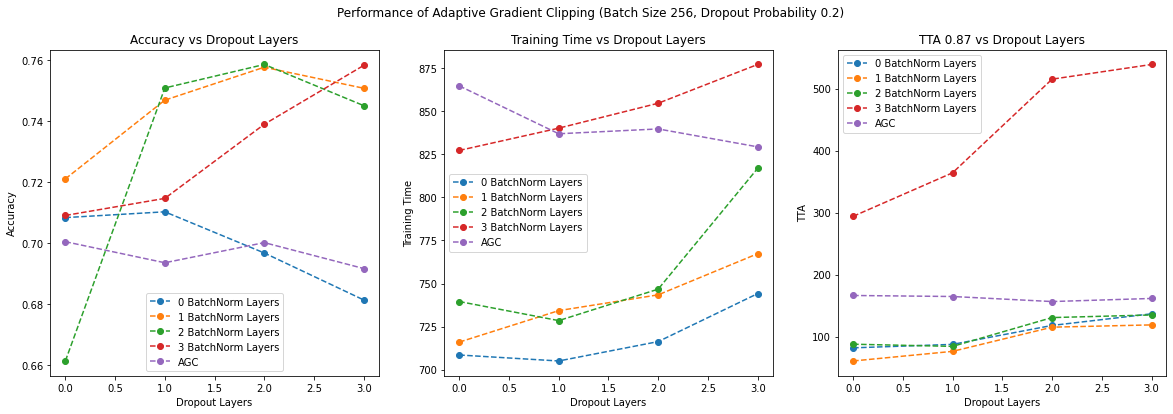

In [5]:
groups = data.groupby('BN Layers')

fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Performance of Adaptive Gradient Clipping (Batch Size 256, Dropout Probability 0.2)')

for name, group in groups:    
    axs[0].plot(group['Dropout ID'], group['Accuracy'], marker='o', linestyle='--', label= str(name) + ' BatchNorm Layers')
axs[0].plot(acg['num_dp_layers'], acg['Accuracy'], marker='o', linestyle='--', label= "AGC")
axs[0].legend()
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Dropout Layers')
axs[0].set_title('Accuracy vs Dropout Layers')

for name, group in groups:    
    axs[1].plot(group['Dropout ID'], group['Traning Time'], marker='o', linestyle='--', label= str(name) + ' BatchNorm Layers')
axs[1].plot(acg['num_dp_layers'], acg['Traning Time'], marker='o', linestyle='--', label= "AGC")
axs[1].legend()
axs[1].set_ylabel('Training Time')
axs[1].set_xlabel('Dropout Layers')
axs[1].set_title('Training Time vs Dropout Layers')

for name, group in groups:    
    axs[2].plot(group['Dropout ID'], group['TTA 0.87'], marker='o', linestyle='--', label= str(name) + ' BatchNorm Layers')
axs[2].plot(acg['num_dp_layers'], acg['TTA 0.87'], marker='o', linestyle='--', label= "AGC")
axs[2].legend()
axs[2].set_ylabel('TTA')
axs[2].set_xlabel('Dropout Layers')
axs[2].set_title('TTA 0.87 vs Dropout Layers')

plt.savefig('../figures/agc_performance.jpg')

Here, we can see that using Adaptive Gradient Clipping does give comparable performance as using no batchnorm, but it doesnt seem to be giving as good performance as using batchnorm and dropout. We will stick to using 2 dropout layers, 2 batchnorm layers and 0.2 dropout probability.

# Final Model Performance

Analysing the performance of our Resnet Model that has been run to convergence. Here, the batch size is 256, and 8 models are analyzed:

1. Baseline: This model contains noregularization techniques, and is our baseline.

2. BatchNorm_Symmetric_Dropout: This model contains 2 batchnorm layers and 2 dropout layers, with a symmetric dropout probability of 0.2 across all layers.

3. Symmetric_DataAugmentation: This model contains 2 batchnorm layers and 2 dropout layers, with a symmetric dropout probability of 0.2 across all layers. Additionally, it also uses data augmentation techniques in the form of Image Transformations.

4. Asymmetric_DataAugmentation: This model contains 2 batchnorm layers and 3 dropout layers, with a asymmetric dropout probability of 0.1, 0.2, and 0.3 across each respective layers. Additionally, it also uses data augmentation techniques in the form of Image Transformations.

5. Symmetric_Cutout_2: This model contains 2 batchnorm layers and 3 dropout layers, with a symmetric dropout probability of 0.2 across all layers. Additionally, it also uses data augmentation techniques in the form of Cutout Regularization. Here, we add 2 cutout images per batch.

6. Symmetric_Cutout_16: This model contains 2 batchnorm layers and 3 dropout layers, with a symmetric dropout probability of 0.2 across all layers. Additionally, it also uses data augmentation techniques in the form of Cutout Regularization. Here, we add 16 cutout images per batch.

7. Asymmetric_Cutout_2: This model contains 2 batchnorm layers and 3 dropout layers, with a asymmetric dropout probability of 0.1, 0.2, and 0.3 across each respective layers. Additionally, it also uses data augmentation techniques in the form of Cutout Regularization. Here, we add 2 cutout images per batch.

8. Asymmetric_Cutout_8: This model contains 2 batchnorm layers and 3 dropout layers, with a asymmetric dropout probability of 0.1, 0.2, and 0.3 across each respective layers. Additionally, it also uses data augmentation techniques in the form of Cutout Regularization. Here, we add 18 cutout images per batch.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/final_models.csv')
data

,Batch Size,BN Layers,DRP Layers,DRP Prob,Data Aug,Test Accuracy,Time to Train,Train Accuracy
0,256,0,0,"[0,0,0]",None,0.6980,1030.291306,0.99056
1,256,2,2,"[0.2,0.2]",None,0.7769,1980.657225,0.98702
2,256,2,2,"[0.2,0.2]",Image_Transform,0.8313,9965.300615,0.97510
3,256,2,3,"[0.1,0.2,0.3]",Image_Transform,0.8538,7900.454152,0.96950
4,256,2,2,"[0.2,0.2,0.2]",Cutout_Reg_2,0.7766,3495.959617,0.99000
5,256,2,2,"[0.2,0.2,0.2]",Cutout_Reg_16,0.7818,9135.450405,0.99000
6,256,2,2,"[0.1,0.2,0.3]",Cutout_Reg_2,0.7863,3521.751251,0.99000


In [4]:
#transform data
#models = ['Baseline','BatchNorm_Symmetric_Dropout', 'Symmetric_DataAugmentation', 'Asymmetric_DataAugmentation', 'Symmetric_Cutout_2', 'Symmetric_Cutout_16', 'Asymmetric_Cutout_2', 'Asymmetric_Cutout_8']
models = ['Baseline','BatchNorm_Symmetric_Dropout', 'Symmetric_DataAugmentation', 'Asymmetric_DataAugmentation', 'Symmetric_Cutout_2', 'Symmetric_Cutout_16', 'Asymmetric_Cutout_2']
data_for_df = []
for i in range(7):
    data_for_df.append([models[i], data.iloc[i]['Test Accuracy']*100, 'Test Accuracy'])
    data_for_df.append([models[i], data.iloc[i]['Train Accuracy']*100, 'Training Accuracy'])

acc_data = pd.DataFrame(data_for_df, columns = ['Model', 'Accuracy', 'Label'])
acc_data

,Model,Accuracy,Label
0,Baseline,69.800001,Test Accuracy
1,Baseline,99.056000,Training Accuracy
2,BatchNorm_Symmetric_Dropout,77.689999,Test Accuracy
3,BatchNorm_Symmetric_Dropout,98.702001,Training Accuracy
4,Symmetric_DataAugmentation,83.130002,Test Accuracy
5,Symmetric_DataAugmentation,97.509998,Training Accuracy
6,Asymmetric_DataAugmentation,85.380000,Test Accuracy
7,Asymmetric_DataAugmentation,96.950001,Training Accuracy
8,Symmetric_Cutout_2,77.660000,Test Accuracy
9,Symmetric_Cutout_2,99.000000,Training Accuracy


In [5]:
tt = []
for i in range(7):
    tt.append([models[i], data.iloc[i]['Time to Train']])
    
tt_data = pd.DataFrame(tt, columns = ['Model', 'Training Time'])
tt_data

,Model,Training Time
0,Baseline,1030.291306
1,BatchNorm_Symmetric_Dropout,1980.657225
2,Symmetric_DataAugmentation,9965.300615
3,Asymmetric_DataAugmentation,7900.454152
4,Symmetric_Cutout_2,3495.959617
5,Symmetric_Cutout_16,9135.450405
6,Asymmetric_Cutout_2,3521.751251


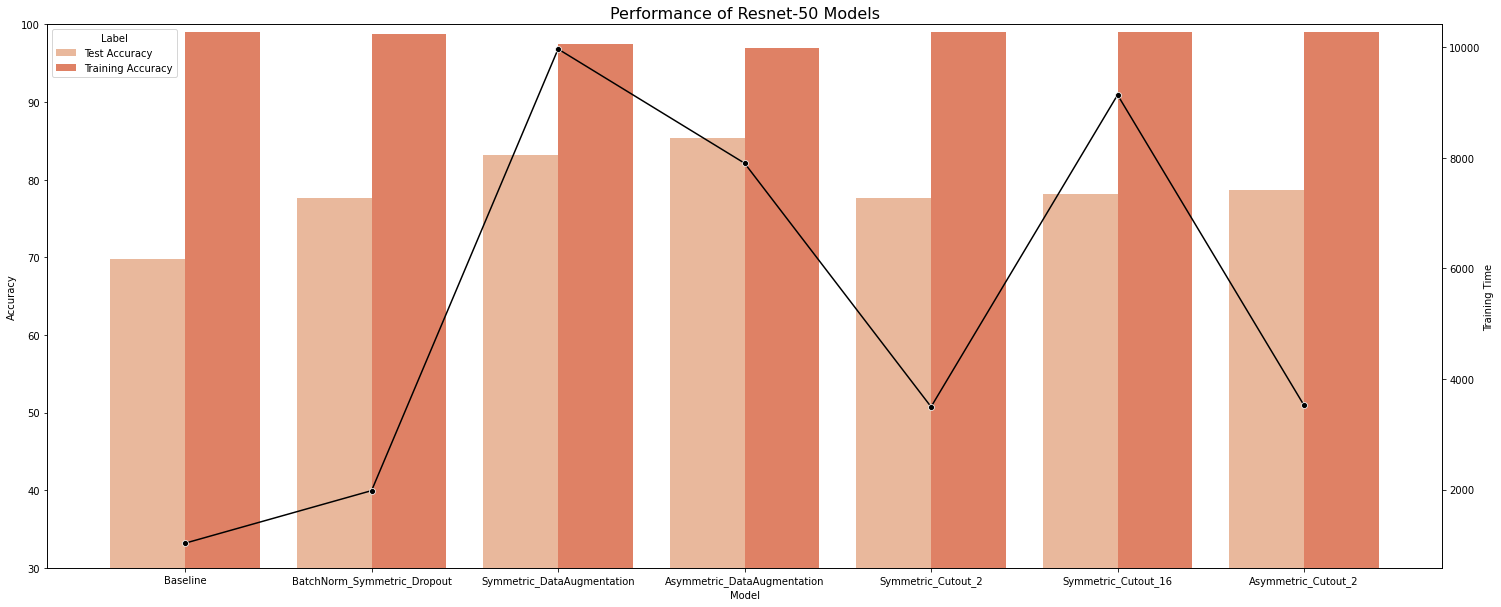

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax1 = plt.subplots(figsize=(25, 10))
ax1.set_title('Performance of Resnet-50 Models', fontsize=16)
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
sns.set_palette("rocket_r")
sns.barplot(x="Model", hue="Label", y="Accuracy", data=acc_data)
ax1.set(ylim=(30, 100))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel('Training Time')
ax2 = sns.lineplot(x='Model', y='Training Time', data = tt_data, sort=False, color = color ,  marker='o')
ax2.tick_params(axis='y', color=color)
plt.show()

plt.savefig('../figures/final_resnet_performance.jpg')